# 🚍 TransJakarta Ridership Analysis  
### Capstone Project Module 2 — Muhammad Farhan Adriansyah

---

#  Business Problem

TransJakarta mengalami penurunan jumlah penumpang pada **akhir pekan (weekend)** dan **jam-jam sepi (off-peak hours)**.  
Hal ini berdampak pada:

- Menurunnya okupansi penumpang  
- Tidak optimalnya penggunaan armada  
- Potensi pendapatan yang tidak maksimal  

### Problem Idea Utama:
**Bagaimana strategi meningkatkan jumlah penumpang saat weekend atau jam sepi?**

---

# Research Questions

Untuk menjawab problem utama tersebut, analisis dikembangkan menjadi beberapa pertanyaan turunan:

### **RQ1 – Weekend vs Weekday Ridership**
Apakah jumlah penumpang weekend lebih rendah dari weekday?

### **RQ2 – Weekend Hourly Pattern**
Weekend paling sepi di jam berapa?

### **RQ3 – Weekend Ridership by Corridor**
Koridor mana yang paling sedikit penumpangnya saat weekend?

### **RQ4 – Weekend Ridership by Stops (Opsional)**
Halte mana yang paling rendah penumpangnya saat weekend?

### **RQ5 – Weekend Trip Duration Analysis**

Apakah durasi perjalanan penumpang pada weekend lebih cepat atau lebih lambat dibanding weekday, serta apakah terdapat pola jam tertentu yang menunjukkan perjalanan lebih lama?


# 📂 Data Understanding

Pada tahap ini, langkah yang dilakukan adalah:

- Memuat dataset TransJakarta
- Melihat struktur data (jumlah baris, kolom, dan tipe data)
- Melihat contoh isi data
- Mengecek apakah ada nilai yang kosong (missing value)

Tujuannya adalah untuk memahami kondisi awal data sebelum dibersihkan.


In [20]:
# Import library yang dibutuhkan untuk analisis data
import pandas as pd

In [21]:
# Load dataset Transjakarta ke dalam dataframe
df = pd.read_csv("Transjakarta.csv")

In [22]:
# Menampilkan 5 baris pertama untuk melihat struktur awal data
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


In [23]:
# Cek gambaran awal dataset
# Menampilkan jumlah baris dan kolom
print("Shape (baris, kolom):", df.shape)
# Menampilkan informasi tipe data dan jumlah non-null per kolom
print("\nInfo kolom:")
print(df.info())
# Menampilkan 5 baris pertama untuk melihat contoh data
print("\nCek 5 baris pertama:")
print(df.head())

Shape (baris, kolom): (37900, 22)

Info kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object

In [24]:
# Mengecek jumlah missing value di setiap kolom
print("\nJumlah missing value per kolom:")
print(df.isna().sum())


Jumlah missing value per kolom:
transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64


# 🧹 Data Cleaning

Beberapa langkah pembersihan data yang dilakukan:

1. **Membuat salinan data (`df_clean`)** agar data asli tetap aman.
2. **Menghapus baris yang memiliki missing value** pada kolom penting seperti:
   - waktu tap-in & tap-out  
   - nama koridor  
   - nama halte  
   - jumlah pembayaran
3. **Mengubah kolom waktu menjadi format datetime** agar bisa dianalisis.
4. **Mengecek duplikasi**, dan hasilnya: tidak ada data yang duplikat.
5. **Membuat beberapa kolom baru** untuk analisis nanti:
   - jam tap-in (`hour`)  
   - nama hari (`day_name`)  
   - penanda weekend (`is_weekend`)
6. **Menghitung durasi perjalanan** dalam menit.
7. **Menyimpan data bersih ke file baru** (`Transjakarta_clean.csv`)

Setelah proses ini selesai, data siap dipakai untuk analisis lebih lanjut

In [25]:
# Membuat salinan dataframe asli untuk proses pembersihan data
df_clean = df.copy()

In [26]:
df_clean

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


In [27]:
# Menghapus baris yang memiliki missing value pada kolom-kolom penting
kolom_penting = [
    "corridorID",
    "corridorName",
    "tapInStopsName",
    "tapOutStopsName",
    "tapInTime",
    "tapOutTime",
    "payAmount"
]

df_clean = df_clean.dropna(subset=kolom_penting)

print("Shape setelah drop missing kolom penting:", df_clean.shape)

Shape setelah drop missing kolom penting: (33657, 22)


In [28]:
# Mengubah kolom tapInTime dan tapOutTime menjadi tipe datetime
df_clean["tapInTime"] = pd.to_datetime(df_clean["tapInTime"], errors="coerce")
df_clean["tapOutTime"] = pd.to_datetime(df_clean["tapOutTime"], errors="coerce")

print(df_clean[["tapInTime", "tapOutTime"]].head())


            tapInTime          tapOutTime
0 2023-04-03 05:21:44 2023-04-03 06:00:53
1 2023-04-03 05:42:44 2023-04-03 06:40:01
2 2023-04-03 05:59:06 2023-04-03 06:50:55
3 2023-04-03 05:44:51 2023-04-03 06:28:16
4 2023-04-03 06:17:35 2023-04-03 06:57:03


C:\Users\USER\AppData\Local\Temp\ipykernel_26708\1886489752.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["tapInTime"] = pd.to_datetime(df_clean["tapInTime"], errors="coerce")
C:\Users\USER\AppData\Local\Temp\ipykernel_26708\1886489752.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["tapOutTime"] = pd.to_datetime(df_clean["tapOutTime"], errors="coerce")


In [29]:
# Mengecek kembali struktur dataframe setelah pembersihan missing value dan konversi datetime
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33657 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           33657 non-null  object        
 1   payCardID         33657 non-null  int64         
 2   payCardBank       33657 non-null  object        
 3   payCardName       33657 non-null  object        
 4   payCardSex        33657 non-null  object        
 5   payCardBirthDate  33657 non-null  int64         
 6   corridorID        33657 non-null  object        
 7   corridorName      33657 non-null  object        
 8   direction         33657 non-null  float64       
 9   tapInStops        32581 non-null  object        
 10  tapInStopsName    33657 non-null  object        
 11  tapInStopsLat     33657 non-null  float64       
 12  tapInStopsLon     33657 non-null  float64       
 13  stopStartSeq      33657 non-null  int64         
 14  tapInTime         33657 non

In [30]:
# Mengecek jumlah baris data yang duplikat
df_clean.duplicated().sum()


np.int64(0)

In [31]:
# Kolom-kolom ini penting untuk analisis jam sibuk, pola harian, dan perbandingan weekday-weekend
df_clean["hour"] = df_clean["tapInTime"].dt.hour
df_clean["day_name"] = df_clean["tapInTime"].dt.day_name()
df_clean["day_of_week"] = df_clean["tapInTime"].dt.dayofweek
df_clean["is_weekend"] = df_clean["day_of_week"] >= 5

df_clean[["tapInTime", "hour", "day_name", "is_weekend"]].head()


C:\Users\USER\AppData\Local\Temp\ipykernel_26708\3808682326.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["hour"] = df_clean["tapInTime"].dt.hour
C:\Users\USER\AppData\Local\Temp\ipykernel_26708\3808682326.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["day_name"] = df_clean["tapInTime"].dt.day_name()
C:\Users\USER\AppData\Local\Temp\ipykernel_26708\3808682326.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

,tapInTime,hour,day_name,is_weekend
0,2023-04-03 05:21:44,5,Monday,False
1,2023-04-03 05:42:44,5,Monday,False
2,2023-04-03 05:59:06,5,Monday,False
3,2023-04-03 05:44:51,5,Monday,False
4,2023-04-03 06:17:35,6,Monday,False


In [32]:
# Membuat kolom durasi perjalanan dalam menit
df_clean["trip_duration_min"] = (df_clean["tapOutTime"] - df_clean["tapInTime"]).dt.total_seconds() / 60
df_clean["trip_duration_min"].head()


C:\Users\USER\AppData\Local\Temp\ipykernel_26708\2286375324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["trip_duration_min"] = (df_clean["tapOutTime"] - df_clean["tapInTime"]).dt.total_seconds() / 60


0    39.150000
1    57.283333
2    51.816667
3    43.416667
4    39.466667
Name: trip_duration_min, dtype: float64

In [33]:
# Menyimpan dataframe yang sudah dibersihkan ke dalam file CSV baru
df_clean.to_csv("Transjakarta_clean.csv", index=False)


# Exploratory Data Analysis (EDA)

## RQ1 – Perbandingan Jumlah Penumpang Weekday vs Weekend
Analisis ini bertujuan untuk melihat apakah terdapat perbedaan jumlah penumpang yang signifikan antara hari kerja (weekday) dan akhir pekan (weekend).


In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data bersih
df = pd.read_csv("Transjakarta_clean.csv")

# Convert ulang kolom waktu
df["tapInTime"] = pd.to_datetime(df["tapInTime"])
df["tapOutTime"] = pd.to_datetime(df["tapOutTime"])

df.head()


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,hour,day_name,day_of_week,is_weekend,trip_duration_min
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,5,Monday,0,False,39.150000
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,5,Monday,0,False,57.283333
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,5,Monday,0,False,51.816667
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,5,Monday,0,False,43.416667
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,6,Monday,0,False,39.466667


In [35]:
# Hitung jumlah penumpang weekday vs weekend
ridership_weekend = df.groupby("is_weekend")["transID"].count()

labels = ["Weekday", "Weekend"]
values = [ridership_weekend[False], ridership_weekend[True]]

values


[np.int64(30367), np.int64(3290)]

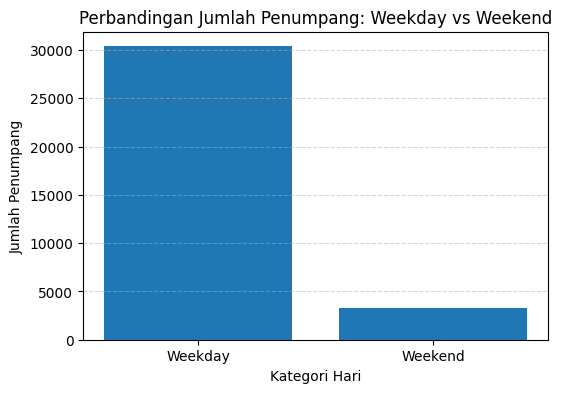

In [36]:
# Membuat visualisasi perbandingan jumlah penumpang weekday vs weekend
plt.figure(figsize=(6,4))
plt.bar(labels, values)
plt.title("Perbandingan Jumlah Penumpang: Weekday vs Weekend")
plt.xlabel("Kategori Hari")
plt.ylabel("Jumlah Penumpang")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


### Insight RQ1 — Perbandingan Jumlah Penumpang Weekday vs Weekend

Hasil analisis menunjukkan bahwa jumlah penumpang TransJakarta pada hari kerja (weekday) sangat tinggi dibandingkan akhir pekan (weekend).  
Tercatat:

- **Weekday:** 30.367 penumpang  
- **Weekend:** 3.290 penumpang  

Artinya terdapat penurunan jumlah penumpang sekitar **89%** saat weekend.  
Hal ini menunjukkan bahwa sebagian besar pengguna TransJakarta adalah pekerja/karyawan yang melakukan perjalanan rutin di hari kerja.

### Implikasi:
- TransJakarta dapat merancang strategi peningkatan ridership di weekend, misalnya menambah rute menuju area wisata, atau menawarkan promosi/kolaborasi event.
- Penyesuaian jadwal dan kapasitas armada juga bisa dilakukan untuk efisiensi operasional di hari dengan permintaan rendah.


## RQ2 — Pola Jam Ramai vs Jam Sepi (Peak Hours Analysis)

Analisis ini bertujuan untuk melihat distribusi jumlah penumpang berdasarkan jam kedatangan (tap-in).  
Dengan mengetahui jam-jam ramai (peak hours) dan jam-jam sepi (off-peak hours), TransJakarta dapat melakukan:

- Penyesuaian jumlah armada pada jam tertentu
- Optimalisasi operasional untuk mengurangi kepadatan
- Efisiensi biaya pada jam-jam dengan permintaan rendah

Grafik berikut menunjukkan jumlah penumpang untuk setiap jam (0–23), sehingga pola mobilitas harian dapat terlihat dengan jelas.


In [37]:
# Menghitung jumlah penumpang berdasarkan jam
ridership_per_hour = df.groupby("hour")["transID"].count()

ridership_per_hour


hour
5     2992
6     5178
7     2481
8     2563
9     2495
10     269
11     307
12     298
13     317
14     158
15     352
16    2986
17    4907
18    2148
19    2158
20    2145
21    1903
Name: transID, dtype: int64

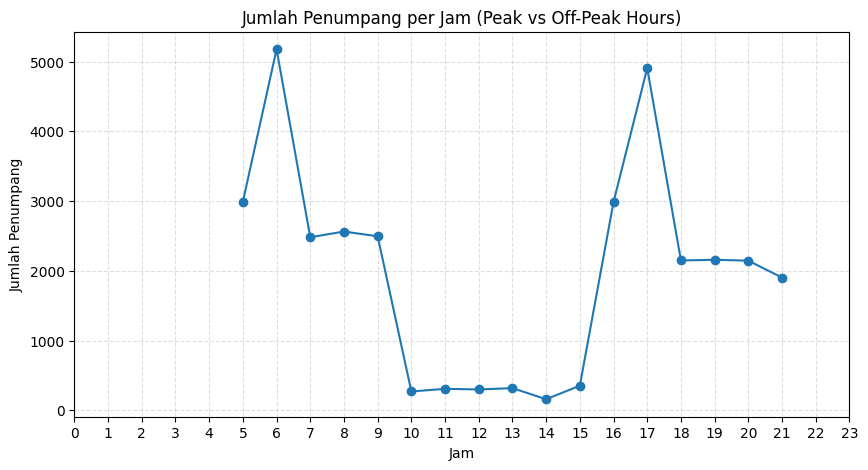

In [38]:
# Visualisasi jumlah penumpang per jam
plt.figure(figsize=(10,5))
plt.plot(ridership_per_hour.index, ridership_per_hour.values, marker='o')
plt.title("Jumlah Penumpang per Jam (Peak vs Off-Peak Hours)")
plt.xlabel("Jam")
plt.ylabel("Jumlah Penumpang")
plt.grid(True, linestyle="--", alpha=0.4)
plt.xticks(range(0, 24))
plt.show()


### 🔍 Insight RQ2 – Pola Jam Ramai vs Jam Sepi

Berdasarkan grafik jumlah penumpang per jam, diperoleh beberapa insight penting:

- **Puncak kepadatan terjadi pada pukul 06.00 dan 17.00**, menunjukkan pola commuting berangkat dan pulang kerja/sekolah.
- **Jam 09.00–15.00 merupakan off-peak**, jumlah penumpang sangat rendah dan stabil.
- **Lonjakan kedua pada pukul 16.00–18.00** menegaskan periode pulang kerja sebagai salah satu waktu tersibuk.
- Setelah pukul 19.00, **aktivitas menurun tajam**, menandakan mobilitas malam relatif kecil.

**Kesimpulan utama:**  
Mobilitas penumpang TransJakarta sangat dipengaruhi pola aktivitas harian pekerja/karyawan. Armada dan jadwal sebaiknya difokuskan untuk memenuhi permintaan tinggi di pagi dan sore hari.



## RQ3 – Analisis Durasi Perjalanan Penumpang (Trip Duration Analysis)

Analisis ini bertujuan untuk memahami berapa lama waktu yang dihabiskan penumpang dalam satu perjalanan. Dengan melihat distribusi durasi perjalanan (dalam menit), TransJakarta dapat memperoleh gambaran mengenai pola pemakaian layanan dan potensi peningkatan efisiensi rute.

Melalui analisis durasi perjalanan, beberapa hal yang dapat dioptimalkan antara lain:

- Identifikasi rute atau jam tertentu yang memiliki durasi perjalanan terlalu lama  
- Evaluasi apakah waktu perjalanan konsisten antara jam sibuk dan tidak sibuk  
- Peningkatan ketepatan waktu serta estimasi perjalanan bagi pengguna

Grafik yang dihasilkan menampilkan distribusi rata-rata durasi perjalanan, sehingga memberikan gambaran umum mengenai seberapa cepat atau lambat perjalanan berlangsung di seluruh data.


In [39]:
# Menghitung jumlah penumpang di setiap koridor
ridership_by_corridor = df.groupby("corridorName")["transID"].count().sort_values(ascending=False)

ridership_by_corridor


corridorName
Cibubur - Balai Kota                              375
Ciputat - CSW                                     371
Harmoni - Jakarta International Stadium           328
Pulo Gadung - Monas                               325
Kampung Rambutan - Pondok Gede                    324
                                                 ... 
Gondangdia - Balai Kota                            39
Senen - Tanah Abang                                38
Term. Pulo Gadung - Lampiri                        31
Tanah Abang - Kebayoran Lama via Pos Pengumben     21
Kampung Rambutan - Blok M                          16
Name: transID, Length: 211, dtype: int64

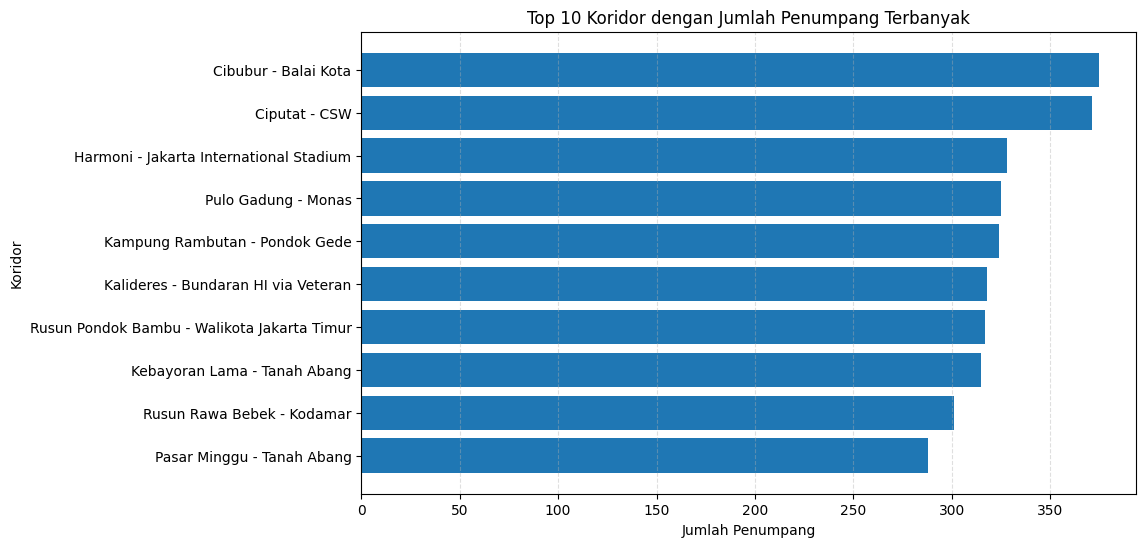

In [40]:
# Visualisasi Top 10 koridor dengan penumpang terbanyak
top10_corridor = ridership_by_corridor.head(10)

plt.figure(figsize=(10,6))
plt.barh(top10_corridor.index, top10_corridor.values)
plt.title("Top 10 Koridor dengan Jumlah Penumpang Terbanyak")
plt.xlabel("Jumlah Penumpang")
plt.ylabel("Koridor")
plt.gca().invert_yaxis()  # Biar ranking 1 di atas
plt.grid(axis="x", linestyle="--", alpha=0.4)
plt.show()


### 🔍 Insight RQ3 – Koridor dengan Jumlah Penumpang Tertinggi

Hasil analisis menunjukkan bahwa tidak semua koridor memiliki tingkat penggunaan yang sama. Beberapa koridor memiliki volume penumpang jauh lebih tinggi dibandingkan lainnya. Hal ini menunjukkan adanya pusat mobilitas utama pada jaringan TransJakarta.

Dari grafik Top 10 koridor, terlihat bahwa:

- Terdapat beberapa koridor yang menjadi **koridor inti (backbone)** dengan jumlah penumpang tertinggi.
- Koridor-koridor teratas kemungkinan melewati kawasan perkantoran, pusat bisnis, atau titik integrasi moda transportasi lain.
- Sebaliknya, koridor yang berada di bawah ranking memiliki volume rendah dan dapat menjadi kandidat untuk **evaluasi rute atau penyesuaian frekuensi**.

Secara keseluruhan, temuan ini dapat menjadi dasar bagi TransJakarta untuk:
- Mengoptimalkan distribusi armada berdasarkan tingkat kepadatan koridor,
- Memperkuat layanan di rute yang paling banyak digunakan,
- Serta mengevaluasi efisiensi operasi pada koridor dengan penumpang rendah.


## RQ4 – Analisis Penggunaan Kartu Pembayaran (Payment Behavior Analysis)

Analisis ini bertujuan untuk melihat pola penggunaan kartu elektronik berdasarkan bank penerbit yang digunakan oleh penumpang. Dengan memahami bank mana yang paling sering dipakai, TransJakarta dapat memperoleh insight terkait preferensi metode pembayaran digital.

Beberapa manfaat dari analisis ini antara lain:

- Mengetahui **bank atau e-money** yang dominan digunakan penumpang  
- Mengidentifikasi peluang **kerja sama strategis** dengan bank yang paling populer  
- Menilai adopsi pembayaran digital pada layanan TransJakarta

Grafik berikut menunjukkan bank penerbit kartu yang paling banyak digunakan penumpang dalam transaksi tap-in.


In [41]:
# Menghitung jumlah transaksi berdasarkan bank penerbit kartu
bank_usage = df.groupby("payCardBank")["transID"].count().sort_values(ascending=False)

bank_usage



payCardBank
dki       16704
emoney     6162
brizzi     3074
flazz      2820
online     2489
bni        2408
Name: transID, dtype: int64

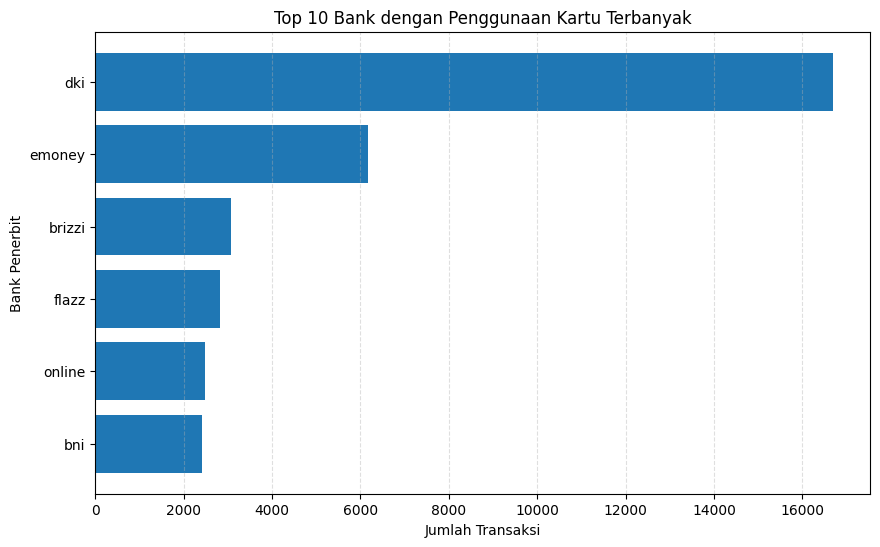

In [42]:
# Visualisasi penggunaan kartu berdasarkan bank (Top 10)
top10_bank = bank_usage.head(10)

plt.figure(figsize=(10,6))
plt.barh(top10_bank.index, top10_bank.values)
plt.title("Top 10 Bank dengan Penggunaan Kartu Terbanyak")
plt.xlabel("Jumlah Transaksi")
plt.ylabel("Bank Penerbit")
plt.gca().invert_yaxis()
plt.grid(axis="x", linestyle="--", alpha=0.4)
plt.show()


### 🔍 Insight Utama RQ4 – Payment Method

Berdasarkan data, **Bank DKI menjadi metode pembayaran yang paling dominan**, jauh melampaui bank penerbit lain.

**Temuan utama:**
- Transaksi JakCard/Bank DKI berada di posisi tertinggi dan sangat mendominasi.
- Mandiri e-money berada di posisi kedua, namun selisihnya masih sangat jauh.
- Brizzi (BRI), Flazz (BCA), dan BNI memiliki kontribusi relatif kecil.

**Implikasi:**
- Kerja sama layanan dan integrasi paling relevan diperkuat dengan Bank DKI.
- Promo atau program loyalti dapat difokuskan pada pengguna JakCard.
- Potensi kolaborasi dengan bank nasional tetap ada, namun prioritasnya lebih rendah.



## RQ5 – Weekend Trip Duration Analysis

Pertanyaan ini bertujuan untuk memahami bagaimana durasi perjalanan penumpang pada weekend dibandingkan dengan weekday. Fokus analisis ada pada:

- Apakah durasi perjalanan weekend lebih cepat atau lebih lambat dibanding weekday  
- Apakah terdapat pola jam tertentu yang membuat durasi perjalanan lebih panjang  
- Bagaimana perbedaan pola durasi perjalanan sepanjang hari

Analisis ini akan membantu melihat apakah mobilitas penumpang dan kondisi operasional berubah saat weekend.


## RQ5 – Weekend Trip Duration Analysis

Analisis ini bertujuan untuk memahami bagaimana durasi perjalanan penumpang berbeda antara weekday dan weekend, serta apakah terdapat pola waktu tertentu yang menyebabkan perjalanan berlangsung lebih lama. Selain itu, ditambahkan analisis statistik lanjutan untuk memahami distribusi durasi perjalanan secara lebih komprehensif.

---

### A. Analisis Dasar
- Menghitung rata-rata durasi weekday vs weekend  
- Membuat visualisasi perbandingan durasi (bar chart)  
- Menganalisis pola durasi per jam (line chart)  

---

### B. Analisis Statistik Lanjutan
- Statistik deskriptif (mean, median, IQR, standar deviasi)  
- Boxplot durasi weekday vs weekend untuk melihat distribusi & outlier  
- Histogram distribusi durasi perjalanan  
---




In [43]:
# Membuat kolom durasi perjalanan dalam menit
df["trip_duration_min"] = (df["tapOutTime"] - df["tapInTime"]).dt.total_seconds() / 60

# Cek 5 baris pertama
df[["tapInTime", "tapOutTime", "trip_duration_min"]].head()


,tapInTime,tapOutTime,trip_duration_min
0,2023-04-03 05:21:44,2023-04-03 06:00:53,39.150000
1,2023-04-03 05:42:44,2023-04-03 06:40:01,57.283333
2,2023-04-03 05:59:06,2023-04-03 06:50:55,51.816667
3,2023-04-03 05:44:51,2023-04-03 06:28:16,43.416667
4,2023-04-03 06:17:35,2023-04-03 06:57:03,39.466667


In [44]:
# Rata-rata durasi perjalanan weekday vs weekend
duration_by_daytype = df.groupby("is_weekend")["trip_duration_min"].mean()
print(duration_by_daytype)


is_weekend
False    72.310550
True     70.506074
Name: trip_duration_min, dtype: float64


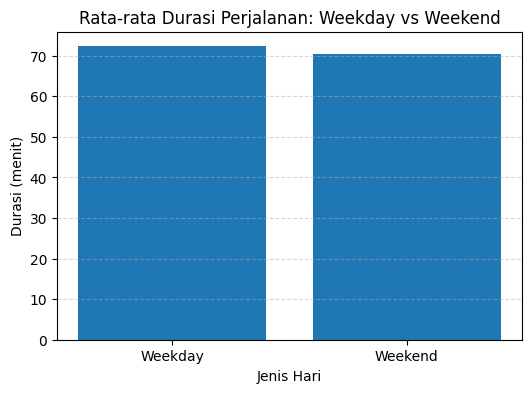

In [45]:
import matplotlib.pyplot as plt

# Menyiapkan label dan nilai
labels = ["Weekday", "Weekend"]
values = [
    duration_by_daytype[False],  # weekday
    duration_by_daytype[True]    # weekend
]

# Membuat bar chart perbandingan rata-rata durasi
plt.figure(figsize=(6, 4))
plt.bar(labels, values)
plt.title("Rata-rata Durasi Perjalanan: Weekday vs Weekend")
plt.xlabel("Jenis Hari")
plt.ylabel("Durasi (menit)")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


In [46]:
# Rata-rata durasi perjalanan per jam
duration_per_hour = df.groupby("hour")["trip_duration_min"].mean()
print(duration_per_hour)


hour
5     43.056211
6     54.998970
7     69.372343
8     70.980238
9     70.198804
10    70.760161
11    66.960749
12    70.903747
13    70.976551
14    68.903692
15    79.602652
16    84.119162
17    84.082185
18    84.111724
19    83.500687
20    83.650249
21    83.465519
Name: trip_duration_min, dtype: float64


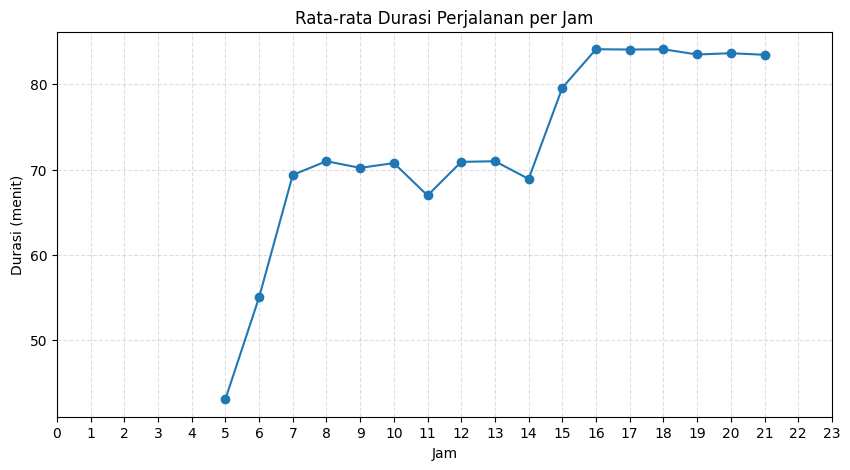

In [47]:
# Visualisasi rata-rata durasi perjalanan per jam
plt.figure(figsize=(10, 5))
plt.plot(duration_per_hour.index, duration_per_hour.values, marker="o")
plt.title("Rata-rata Durasi Perjalanan per Jam")
plt.xlabel("Jam")
plt.ylabel("Durasi (menit)")
plt.grid(True, linestyle="--", alpha=0.4)
plt.xticks(range(0, 24))
plt.show()


In [51]:
df["day_type"] = df["is_weekend"].map({
    False: "Weekday",
    True: "Weekend"
})

In [52]:
import numpy as np

# Statistik deskriptif durasi perjalanan weekday vs weekend
stats_by_daytype = df.groupby("day_type")["trip_duration_min"].agg(
    count="count",
    mean="mean",
    median="median",
    std="std",
    q1=lambda x: x.quantile(0.25),
    q3=lambda x: x.quantile(0.75),
)

stats_by_daytype["IQR"] = stats_by_daytype["q3"] - stats_by_daytype["q1"]
print(stats_by_daytype)



          count       mean     median        std         q1         q3  \
day_type                                                                 
Weekday   30367  72.310550  72.133333  27.769640  51.416667  95.666667   
Weekend    3290  70.506074  69.650000  30.618699  46.391667  96.258333   

                IQR  
day_type             
Weekday   44.250000  
Weekend   49.866667  


<Figure size 600x400 with 0 Axes>

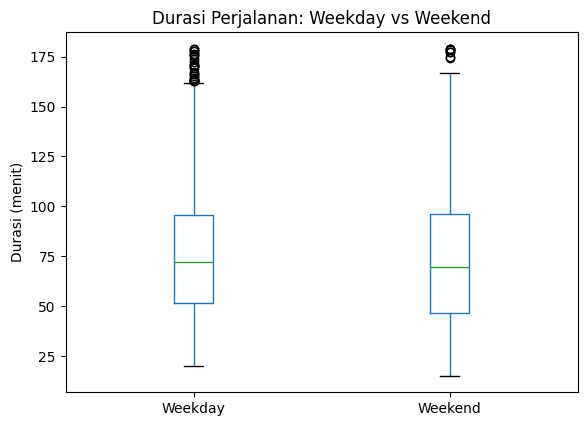

In [19]:
# Boxplot durasi perjalanan: weekday vs weekend
plt.figure(figsize=(6,4))
df.boxplot(column="trip_duration_min", by="is_weekend", grid=False)

plt.title("Durasi Perjalanan: Weekday vs Weekend")
plt.suptitle("")
plt.xlabel("")
plt.ylabel("Durasi (menit)")
plt.xticks([1,2], ["Weekday", "Weekend"])

plt.show()



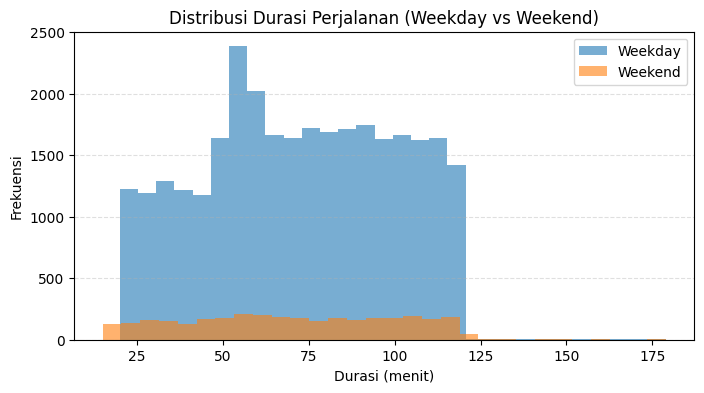

In [18]:
# Histogram distribusi durasi perjalanan untuk weekday dan weekend
plt.figure(figsize=(8, 4))

weekday_duration = df.loc[~df["is_weekend"], "trip_duration_min"]
weekend_duration = df.loc[df["is_weekend"], "trip_duration_min"]

plt.hist(weekday_duration, bins=30, alpha=0.6, label="Weekday")
plt.hist(weekend_duration, bins=30, alpha=0.6, label="Weekend")

plt.title("Distribusi Durasi Perjalanan (Weekday vs Weekend)")
plt.xlabel("Durasi (menit)")
plt.ylabel("Frekuensi")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.show()


### 🔍 Insight Utama RQ5 – Weekend Trip Duration (Final)

Berdasarkan analisis lengkap durasi perjalanan (mean, median, IQR, distribusi, boxplot, dan pola per jam), diperoleh beberapa temuan utama berikut:

---

#### **1. Perbedaan Durasi Weekday vs Weekend**
- Durasi perjalanan **weekend sedikit lebih cepat** daripada weekday.  
  - Weekday: **±72.31 menit**  
  - Weekend: **±70.50 menit**  
- Selisih sekitar **1.8 menit**, menunjukkan kondisi lalu lintas lebih longgar dan stabil pada weekend.
- Median weekend (**69.65 menit**) lebih rendah dari weekday (**72.13 menit**), memperkuat temuan tersebut.

---

#### **2. Variabilitas Durasi Perjalanan**
- Weekend memiliki variasi durasi **lebih besar**, ditunjukkan oleh:
  - IQR weekend: **49.87 menit**  
  - IQR weekday: **44.25 menit**
- Boxplot menunjukkan weekend lebih mudah menghasilkan perjalanan yang sangat cepat atau sangat lambat (lebih banyak *spread*).
- Ini menandakan bahwa meskipun rata-rata lebih cepat, **durasi weekend lebih tidak konsisten**.

---

#### **3. Pola Durasi Per Jam**
- Durasi tercepat terjadi pada **05:00–06:00**, yaitu saat lalu lintas masih sangat lengang.
- Durasi naik pada jam 07:00 dan stabil sekitar **70–72 menit** di sepanjang siang.
- Pada sore hari **(15:00–17:00)** durasi meningkat signifikan hingga **84–85 menit**, dipengaruhi:
  - Waktu pulang kerja
  - Kepadatan lalu lintas
- Setelah pukul 18:00 durasi tetap tinggi namun **lebih stabil**.

---

#### **4. Distribusi Durasi (Histogram)**
- Weekday mempunyai jumlah perjalanan jauh lebih banyak sehingga distribusinya lebih padat.
- Weekend memiliki sebaran lebih lebar, menunjukkan:
  - Lebih banyak perjalanan ekstrem (sangat cepat atau sangat lama)
  - Durasi tidak sepenuhnya seragam
- Kedua hari menunjukkan distribusi **skew ke kanan**, artinya terdapat beberapa perjalanan berdurasi panjang.

---

#### **5. Kesimpulan Umum**
- Weekend: lebih cepat tapi lebih tidak stabil.  
- Weekday: lebih padat tapi lebih konsisten.  
- Jam paling bermasalah untuk kedua hari adalah **15:00–17:00** (peak delay).

---

## 🧩 Final Insight Summary

- Weekend sedikit lebih cepat dibanding weekday (selisih ±1.8 menit).
- Variabilitas weekend lebih besar (IQR lebih tinggi) → perjalanan lebih tidak konsisten.
- Durasi puncak terjadi pada jam 15:00–17:00 (84–85 menit).
- Jam paling cepat: 05:00–06:00.
- Distribusi weekday lebih terpusat (lebih stabil).


In [56]:
df.to_csv("Transjakarta_clean.csv", index=False)
